In [88]:
# 41.Find the visit type with maximum 'No Show'

import pandas as pd
import numpy as np

df = pd.read_excel('HospitalDatabase .xlsx','AmbulatoryVisits')
flt_df = df[df['VisitStatus'] == 'No Show']

df = flt_df.groupby(['VisitType'])['VisitType'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(1)

df

,VisitType,count
2,Telemedicine,74


In [64]:
#42	Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.

import pandas as pd
df = pd.read_excel("HospitalDatabase .xlsx",'Providers')

dfsurgery = df.loc[(df['ProviderSpecialty']=='Surgery') & (df['ProviderID'].between(11, 20))]
dfsurgery


,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.468
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


In [13]:
#43	Write a regular expression to find all the digits and numbers in the string.

import re

str = 'patient MRN is 862, visitType Telemedicine, visted on 3/19/2019 '

x = re.findall('[0-9]+', str)
print(x)

['862', '3', '19', '2019']


In [89]:
#44	Create a pivot table displaying average LOS based on Service and Primary Diagnosis.


df = pd.read_excel('HospitalDatabase .xlsx','ReAdmissionRegistry')

pivot = df.pivot_table(index=['Service','PrimaryDiagnosis'], values=['ExpectedLOS'], aggfunc='mean')

print (pivot)

                                     ExpectedLOS
Service          PrimaryDiagnosis               
Cardiology       AMI                   12.414202
                 Afib                  13.162920
                 Broken Leg             3.911826
                 Flu                    3.970428
                 Heart Failure         13.014044
                 Kidney Failure         6.580273
General Medicine Broken Leg             3.368132
                 Diabetes               5.665298
                 Fever                  6.803796
                 Flu                    6.141753
                 Hypertension           5.369365
                 Kidney Failure         5.943163
                 Laceration             6.771154
                 Pneumonia              6.140270
                 Stroke                 7.173333
Hospitalist      AMI                   13.828290
                 Broken Leg             7.125069
                 Diabetes               7.874359
                 Fev

In [152]:
#45	Calculate mortality by diagnosis.


df = pd.read_excel('HospitalDatabase .xlsx','ReAdmissionRegistry')

df1 = pd.DataFrame(df, 
                   columns = ['PrimaryDiagnosis',
                             'ExpectedMortality'])
'''percentage = df1.groupby(['PrimaryDiagnosis'])['ExpectedMortality'].sum() /  (df1['ExpectedMortality'].sum()) * 100'''
 
rslt_cnt = df1.groupby(['PrimaryDiagnosis'])['ExpectedMortality'].count()                              
print(rslt_cnt)

PrimaryDiagnosis
AMI                    48
Afib                   11
Broken Leg              9
Diabetes               64
Fever                  19
Flu                    80
Heart Failure          78
Hip Fracture           23
Hypertension           50
Kidney Failure         20
Knee Replacement       23
Laceration             29
Migraine               12
Pain                    7
Pneumonia             177
Spinal Cord Injury      2
Stroke                 68
Name: ExpectedMortality, dtype: int64


In [66]:
#46 Write a code to split a sentence into words using regex.

str = 'I am     working on    HospitalDB dataset'

words = re.split('\s+',str)
print(words)

['I', 'am', 'working', 'on', 'HospitalDB', 'dataset']


In [174]:
# 47.Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.


df = pd.read_excel('HospitalDatabase .xlsx','AmbulatoryVisits')

maxCol=df.loc[df['BloodPressureSystolic'].idxmax()]
print(maxCol)

VisitID                                          933
PatientMRN                                       884
ProviderID                                        27
DateofVisit                      2019-02-14 00:00:00
DateScheduled             2019-01-22 19:26:49.163000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                          190.0
BloodPressureDiastolic                    143.989174
Pulse                                      74.976879
VisitStatus                                Completed
Name: 236, dtype: object


In [90]:
# 48. Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy)


df = pd.read_excel('HospitalDatabase .xlsx','ReAdmissionRegistry')
df1 = pd.DataFrame(df, 
                   columns = ['Service',
                             'DischargeDisposition', 'ExpectedLOS'])

avgLOS = df1.groupby(['Service','DischargeDisposition'])['ExpectedLOS'].mean().reset_index(name='average-LOS') 

print(avgLOS)

             Service DischargeDisposition  average-LOS
0         Cardiology              Expired     9.202626
1         Cardiology                 Home    12.864936
2         Cardiology             Transfer    11.818403
3   General Medicine              Expired     5.874003
4   General Medicine                 Home     6.105696
5   General Medicine             Transfer     6.116124
6        Hospitalist              Expired     6.775636
7        Hospitalist                 Home     8.009046
8        Hospitalist             Transfer     5.701389
9                ICU              Expired     9.919063
10               ICU                 Home    13.451158
11               ICU             Transfer    11.989238
12         Neurology              Expired     9.384312
13         Neurology                 Home    12.538859
14         Neurology             Transfer    11.469198
15      Orthopeadics              Expired     3.943883
16      Orthopeadics                 Home     3.508337
17      Or

In [79]:
# 49.  Retrieve the rows where SBP<140 and DBP<80.
import numpy as np
import pandas as pd

df = pd.read_excel('HospitalDatabase .xlsx','AmbulatoryVisits')

result = np.where((df['BloodPressureSystolic'] < 140) & (df['BloodPressureDiastolic'] < 80))

display(df.loc[result])

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
5,809,894,31,2019-03-13,2019-02-28 10:28:01.091,2,Physical,121.0,57.692485,60.402573,No Show
16,707,859,36,2019-03-16,2019-02-26 17:42:39.779,6,Follow Up,137.0,72.756586,64.071361,No Show
18,503,887,12,2019-01-21,2019-01-07 06:04:17.575,7,Follow Up,131.0,74.163851,97.248671,No Show
19,710,862,1,2019-03-19,2019-03-03 11:39:03.145,9,Telemedicine,127.0,66.406797,94.537837,No Show
23,711,863,1,2019-03-20,2019-03-10 07:34:56.766,10,Telemedicine,124.0,77.303553,77.926874,No Show
...,...,...,...,...,...,...,...,...,...,...,...
909,177,815,32,2019-02-22,2019-02-04 06:53:41.987,9,Follow Up,122.0,67.615828,52.742629,Canceled
929,786,871,34,2019-03-25,2019-02-26 09:48:42.832,3,Telemedicine,122.0,78.210501,53.760978,Canceled
932,394,623,6,2019-02-05,2019-01-10 05:43:34.544,9,Physical,130.0,75.114100,80.951071,Canceled
941,399,638,11,2019-02-10,2019-02-02 20:49:56.868,2,Physical,121.0,64.896818,68.496869,Canceled


In [91]:
# 50. Which departmentID has maximum number of visits scheduled.

df = pd.read_excel('HospitalDatabase .xlsx','AmbulatoryVisits')

df1 = pd.DataFrame(df, 
                   columns = ['VisitDepartmentID',
                             'DateScheduled'])
maxId = df1.groupby(['VisitDepartmentID'])['DateScheduled'].count() \
                             .reset_index(name='maxCount') \
                             .sort_values(['maxCount'], ascending=False) \
                             .head(1)
print(maxId)
                             

    VisitDepartmentID  maxCount
10                 11       102


In [80]:
#51	Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

import numpy as np
import pandas as pd

df = pd.read_excel('HospitalDatabase .xlsx','EDUnique')

result = np.where(((df['ReasonForVisit'] == 'Migraine') | (df['ReasonForVisit'] == 'Pneumonia')) & (df['Acuity'] >= 2))
display(df.loc[result])

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
11,29,29,2020-01-01 06:51:28.639,2020-01-02 05:57:01.639,2,Pneumonia,Admitted
12,30,30,2020-01-01 07:25:54.177,2020-01-01 23:30:20.151,3,Pneumonia,Admitted
13,31,31,2020-01-01 07:32:51.917,2020-01-01 19:55:46.991,4,Pneumonia,Admitted
...,...,...,...,...,...,...,...
853,1027,773,2020-01-13 15:27:07.001,2020-01-14 13:27:31.778,2,Migraine,Discharged
896,1104,850,2020-01-14 10:46:08.650,2020-01-14 20:52:26.031,2,Migraine,Discharged
898,1106,852,2020-01-14 11:19:41.401,2020-01-15 02:47:17.353,2,Migraine,Discharged
906,1122,868,2020-01-14 15:05:58.777,2020-01-15 13:53:02.550,2,Migraine,Discharged


In [81]:
# 52. Retrieve the row with minimum DBP using sorting technique.


df = pd.read_excel('HospitalDatabase .xlsx','AmbulatoryVisits')

df.sort_values(by=['BloodPressureDiastolic']).head(1)

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed


In [82]:
#53 Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

user_input= str(input("Enter the ReasonForVisit : "))

import pandas as pd

df_discharges = pd.read_excel ('HospitalDatabase .xlsx', sheet_name='EDVisits')

reasonforvisitdf = df_discharges[df_discharges.ReasonForVisit == user_input]

final_df = reasonforvisitdf.groupby(['ReasonForVisit'])['EDVisitID'].count()

final_df

Enter the ReasonForVisit : Fever


ReasonForVisit
Fever    234
Name: EDVisitID, dtype: int64

In [154]:
# 54. Mortality O.E.

df = pd.read_excel('HospitalDatabase .xlsx','Discharges')

ObservedM = df[df['DischargeDisposition'] == 'Expired']['ExpectedMortality'].count()

ExpectedMt = df.pivot_table(index=['DischargeDisposition'], \
                            values=['ExpectedMortality'], \
                            aggfunc='count',margins=True).iloc[-1]
Mortality_OE = ObservedM / ExpectedMt

Mortality_OE



ExpectedMortality    0.144444
Name: All, dtype: float64

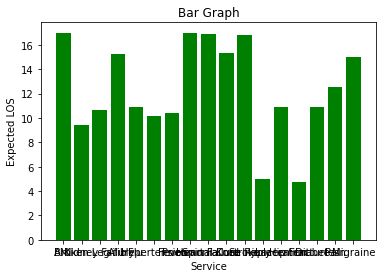

In [152]:
#55 Create a bar chart on service & expected length of stay.

import matplotlib.pyplot as plt
import pandas as pd

excel_file = pd.read_excel("HospitalDatabase .xlsx","Discharges")
df1 = pd.DataFrame(excel_file)
  
X = list(df1.iloc[:,6])
Y = list(df1.iloc[:,7])
  
plt.bar(X, Y, color='g')
plt.title("Bar Graph")
plt.xlabel("Service")
plt.ylabel("Expected LOS")

plt.show()


In [168]:
# 56. Count of canceled status.

df = pd.read_excel('HospitalDatabase .xlsx','AmbulatoryVisits')
flt_df = df[df['VisitStatus'] == 'Canceled']

cntStatus = flt_df.groupby(['VisitStatus'])['VisitStatus'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(1)
print(cntStatus)

  VisitStatus  count
0    Canceled     60


In [153]:
#57 .Find the age prone to get stroke.

import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_excel("HospitalDatabase .xlsx", "Discharges")
dfs = df[df['PrimaryDiagnosis']=='Stroke']
dfp = pd.read_excel("HospitalDatabase .xlsx", "Patients")
df_stroke = (dfp.loc[(dfs.PatientID)])
df_stroke["Age"] = ((dt.datetime.now()-df_stroke["DateOfBirth"]).astype ('<m8[Y]'))
df_stroke.loc[(df_stroke['Age']>=30) & (df_stroke["Age"]<40),['Age prone to get Stroke']]='30-39'
df_stroke.loc[(df_stroke['Age']>=40) & (df_stroke["Age"]<50),['Age prone to get Stroke']]='40-49'
df_stroke.loc[(df_stroke['Age']>=50) & (df_stroke["Age"]<60),['Age prone to get Stroke']]='50-59'
df_stroke.loc[df_stroke['Age']>=60,['Age prone to get Stroke']]='60 and Above 60'
df_stroke
df_count = df_stroke.groupby(['Age prone to get Stroke'])['PatientID'] \
.count() \
.reset_index(name ='Number of Patients') \
.sort_values(['Number of Patients'],ascending=False) \
.head(1)
df_count


,Age prone to get Stroke,Number of Patients
1,40-49,30


In [50]:
#58. Display total count of patients service wise based on gender.

import pandas as pd
from datetime import datetime, date

df_discharges = pd.read_excel ('HospitalDatabase .xlsx', sheet_name='Discharges')

df_patients = pd.read_excel ('HospitalDatabase .xlsx', sheet_name='Patients')

merged_df = pd.merge(df_discharges,df_patients, left_on='PatientID', right_on='PatientID', how='left')

final_df = merged_df.groupby(['Service','Gender'])['AdmissionID'].count().reset_index(name='Count') 

final_df




,Service,Gender,Count
0,Cardiology,Female,41
1,Cardiology,Male,54
2,General Medicine,Female,114
3,General Medicine,Male,149
4,Hospitalist,Female,35
5,Hospitalist,Male,66
6,ICU,Female,65
7,ICU,Male,86
8,Neurology,Female,34
9,Neurology,Male,31


In [47]:
# 59. Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

import pandas as pd
from datetime import datetime, date

df = pd.read_excel ('HospitalDatabase .xlsx', sheet_name='Providers')

df[['Firstname','Lastname']] = df.ProviderName.str.split(expand=True)

df

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff,Firstname,Lastname
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000,Sally,Sue
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695,Mike,Myers
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687,Jordan,Michael
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299,Ted,Texas
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838,Ala,Bama
5,6,Harry Kane,Pediatrics,1995-07-21 03:49:03.310,Harry,Kane
6,7,Barry Bar,Pediatrics,1995-11-21 19:30:38.759,Barry,Bar
7,8,Ted Green,Pediatrics,1996-05-30 06:14:52.539,Ted,Green
8,9,Ted Black,Pediatrics,1997-02-20 08:01:10.211,Ted,Black
9,10,Fred Man,Surgery,1998-03-17 01:47:18.794,Fred,Man


In [77]:
#60	 Find the list of patients whose ExpectedLOS is greater than the value given by the user.

user_input= str(input("Enter the ExpectedLOS : "))

import pandas as pd

df_discharges = pd.read_excel ('HospitalDatabase .xlsx', sheet_name='Discharges')

expectedlosdf = df_discharges[df_discharges.ExpectedLOS > int(user_input)]

final_df = expectedlosdf.groupby(['ExpectedLOS','PatientID'])['PatientID'].count()

final_df


Enter the ExpectedLOS : 15


ExpectedLOS  PatientID
15.041549    486          1
15.074307    406          1
15.116540    448          1
15.118850    59           1
15.142298    264          1
15.156452    307          1
15.183750    178          1
15.212173    230          1
15.273152    462          1
15.287647    458          1
15.349671    19           1
15.366281    666          1
15.369330    198          1
15.415514    27           1
15.422103    139          1
15.435455    731          1
15.440714    284          1
15.442762    194          1
15.462210    329          1
15.471412    709          1
15.503041    667          1
15.516297    208          1
15.573663    221          1
15.622700    83           1
15.627740    470          1
15.660602    108          1
15.712913    533          1
15.745479    687          1
15.811000    543          1
15.883172    262          1
15.895307    113          1
15.958583    588          1
16.032985    365          1
16.122515    587          1
16.154370    355         